In [1]:
import os
import json
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

from osgeo import gdal

In [8]:
DATA_ROOT_DIR = "/Volumes/X/Data/fusion-s1-s2/"
S2_ROOT_PATH = f"{DATA_ROOT_DIR}s2/sre-10m/"
ORBIT = "044"
S1_ROOT_PATH = f"{DATA_ROOT_DIR}s1db/32VNH/threeband/{ORBIT}/"

In [9]:
def closest_date(target_date, date_array):
    target = datetime.strptime(target_date, '%Y%m%d')
    date_array = [datetime.strptime(date, '%Y%m%d') for date in date_array]
    closest_date = min(date_array, key=lambda x: abs(target - x))
    return closest_date.strftime('%Y%m%d')

In [10]:
def date_difference(date1, date2):
    d1 = datetime.strptime(date1, '%Y%m%d')
    d2 = datetime.strptime(date2, '%Y%m%d')
    difference = abs(d1 - d2)

    # Convert the difference to 'YYYYMMDD' format
    years = difference.days // 365
    months = (difference.days % 365) // 30
    days = (difference.days % 365) % 30

    return f'{years:04d}{months:02d}{days:02d}'

In [11]:
with open("data/candidates_filtered_water.json", "r") as f:
    candidates = json.load(f)

In [12]:
def closest_date(target_date, date_array):
    target = datetime.strptime(target_date, '%Y%m%d')
    date_array = [d for d in date_array if "Store" not in d]
    date_array = [datetime.strptime(date, '%Y%m%d') for date in date_array]
    closest_date = min(date_array, key=lambda x: abs(target - x))
    return closest_date.strftime('%Y%m%d')

In [13]:
DATASET_TRAIN, DATASET_TEST, DATASET = {}, {}, {}

In [14]:
s1_dates = [d.split("_")[-1] for d in os.listdir(f"data/cropped/s1/")]
idx = 0

for k, v in candidates.items():
    cloudy = v["cloudy"]
    cloudy_name = "_".join(v["cloudy"].split("_")[:3])

    cloud_free = v["cloud_free"]
    cloud_free_name = "_".join(v["cloud_free"].split("_")[:3])
    date_cloudy = cloudy.split("_")[2]

    s1_date = closest_date(date_cloudy, s1_dates)
    TEMP_DATASET = {
        "s2_cloudy_B02": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B02/{'_'.join(cloudy.split('_')[:3])}_B02_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B03": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B03/{'_'.join(cloudy.split('_')[:3])}_B03_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B04": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B04/{'_'.join(cloudy.split('_')[:3])}_B04_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B05": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B05/{'_'.join(cloudy.split('_')[:3])}_B05_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B06": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B06/{'_'.join(cloudy.split('_')[:3])}_B06_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B07": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B07/{'_'.join(cloudy.split('_')[:3])}_B07_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B08": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B08/{'_'.join(cloudy.split('_')[:3])}_B08_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B8A": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B8A/{'_'.join(cloudy.split('_')[:3])}_B8A_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B11": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B11/{'_'.join(cloudy.split('_')[:3])}_B11_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B12": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B12/{'_'.join(cloudy.split('_')[:3])}_B12_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloud_free_B02": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B02/{'_'.join(cloud_free.split('_')[:3])}_B02_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B03": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B03/{'_'.join(cloud_free.split('_')[:3])}_B03_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B04": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B04/{'_'.join(cloud_free.split('_')[:3])}_B04_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B05": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B05/{'_'.join(cloud_free.split('_')[:3])}_B05_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B06": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B06/{'_'.join(cloud_free.split('_')[:3])}_B06_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B07": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B07/{'_'.join(cloud_free.split('_')[:3])}_B07_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B08": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B08/{'_'.join(cloud_free.split('_')[:3])}_B08_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B8A": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B8A/{'_'.join(cloud_free.split('_')[:3])}_B8A_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B11": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B11/{'_'.join(cloud_free.split('_')[:3])}_B11_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B12": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B12/{'_'.join(cloud_free.split('_')[:3])}_B12_{'_'.join(cloud_free.split('_')[3:])}",
        "s1_hv": f"data/cropped/s1/S1_32VNH_{s1_date}/S1_32VNH_{s1_date}_HV/S1_32VNH_{s1_date}_HV_{'_'.join(cloudy.split('_')[3:])}",
        "s1_vv": f"data/cropped/s1/S1_32VNH_{s1_date}/S1_32VNH_{s1_date}_VV/S1_32VNH_{s1_date}_VV_{'_'.join(cloudy.split('_')[3:])}",
    }

    if all([os.path.isfile(tv) for tv in TEMP_DATASET.values()]):
        DATASET[idx] = TEMP_DATASET
        idx += 1

with open("data/dataset_filtered_water.json", "w") as f:
    json.dump(DATASET, f)


In [17]:
# Separate dataset
with open("data/dataset_filtered_water.json", "r") as f:
    DATASET = json.load(f)
    
dataset_keys = list(DATASET.keys())
np.random.shuffle(dataset_keys)
split_index = int(0.9 * len(dataset_keys))

dataset_keys_train = dataset_keys[:split_index]
dataset_keys_test = dataset_keys[split_index:]

In [18]:
i = 0
for k in dataset_keys_train:
    DATASET_TRAIN[i] = DATASET[k]
    i += 1

with open("data/dataset_filtered_water_train.json", "w") as f:
    json.dump(DATASET_TRAIN, f)

l = 0
for k in dataset_keys_test:
    DATASET_TEST[l] = DATASET[k]
    l += 1
with open("data/dataset_filtered_water_test.json", "w") as f:
    json.dump(DATASET_TEST, f)


In [21]:
im = gdal.Open("data/cropped/s2/S2_32VNH_20200813/S2_32VNH_20200813_B08/S2_32VNH_20200813_B08_1_502540_6297440_256.vrt")

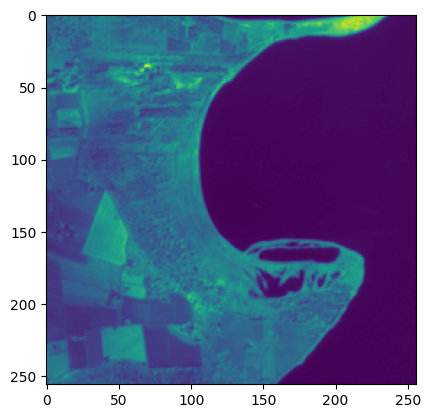

In [22]:
plt.imshow(im.ReadAsArray())